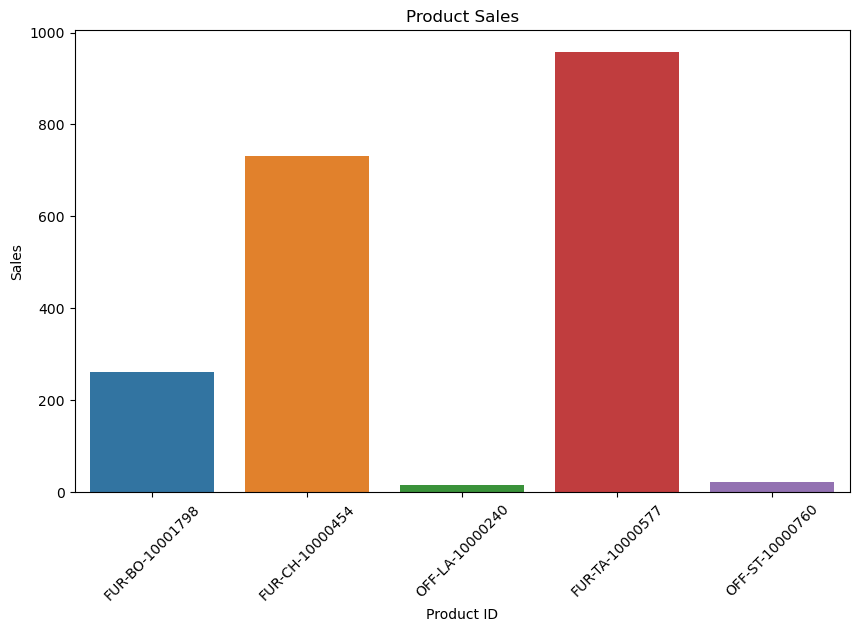

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = {
    'Row_ID': [1, 2, 3, 4, 5],
    'Order_ID': ['CA-2017-152156', 'CA-2017-152156', 'CA-2017-138688', 'US-2016-108966', 'US-2016-108966'],
    'Order_Date': ['2017-11-08', '2017-11-08', '2017-06-12', '2016-10-11', '2016-10-11'],
    'Ship_Date': ['2017-11-11', '2017-11-11', '2017-06-16', '2016-10-18', '2016-10-18'],
    'Ship_Mode': ['Second Class', 'Second Class', 'Second Class', 'Standard Class', 'Standard Class'],
    'Customer_ID': ['CG-12520', 'CG-12520', 'DV-13045', 'SO-20335', 'SO-20335'],
    'Customer_Name': ['Claire Gute', 'Claire Gute', 'Darrin Van Huff', 'Sean O\'Donnell', 'Sean O\'Donnell'],
    'Segment': ['Consumer', 'Consumer', 'Corporate', 'Consumer', 'Consumer'],
    'Country': ['United States', 'United States', 'United States', 'United States', 'United States'],
    'City': ['Henderson', 'Henderson', 'Los Angeles', 'Fort Lauderdale', 'Fort Lauderdale'],
    'State': ['Kentucky', 'Kentucky', 'California', 'Florida', 'Florida'],
    'Postal_Code': [42420, 42420, 90036, 33311, 33311],
    'Region': ['South', 'South', 'West', 'South', 'South'],
    'Product_ID': ['FUR-BO-10001798', 'FUR-CH-10000454', 'OFF-LA-10000240', 'FUR-TA-10000577', 'OFF-ST-10000760'],
    'Category': ['Furniture', 'Furniture', 'Office Supplies', 'Furniture', 'Office Supplies'],
    'Sub_Category': ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage'],
    'Product_Name': ['Bush Somerset Collection Bookcase', 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
                      'Self-Adhesive Address Labels for Typewriters by Universal',
                      'Bretford CR4500 Series Slim Rectangular Table', 'Eldon Foldex ...'],
    'Sales': [261.96, 731.94, 14.62, 957.5775, 22.368]
}

superstore_data = pd.DataFrame(data)

# Product Analysis
# A. Visualize the Product details with their Product ID and Product Name.
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_ID', y='Sales', data=superstore_data)
plt.title('Product Sales')
plt.xlabel('Product ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


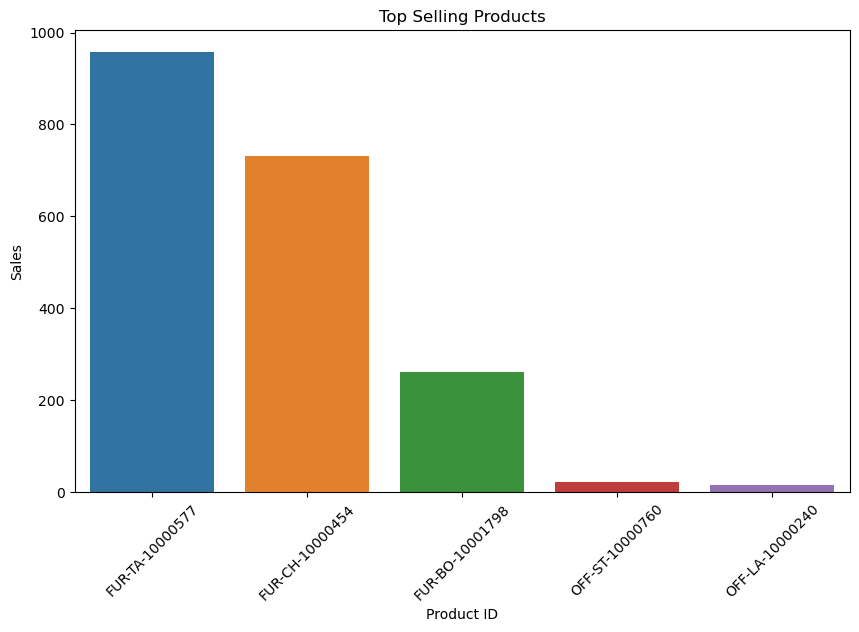

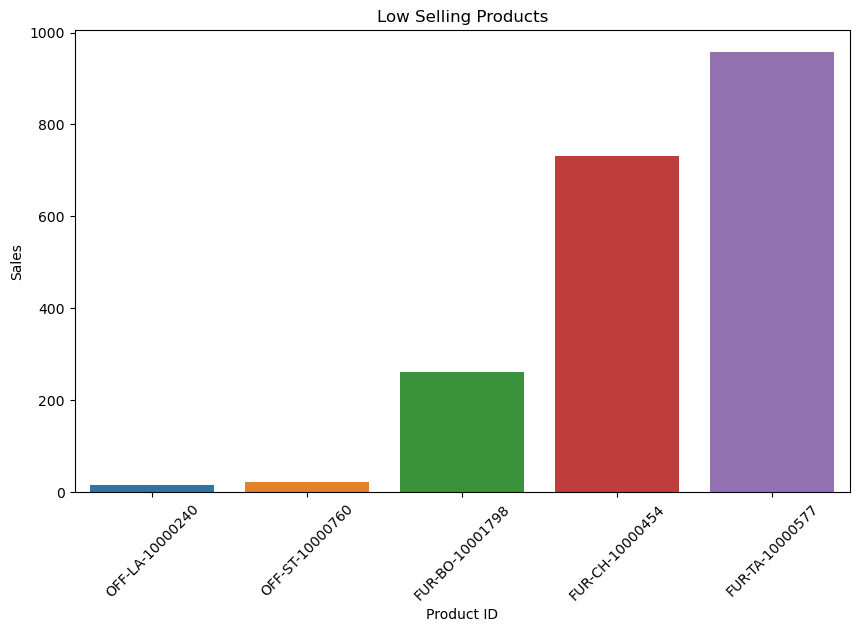

In [2]:
# B. Visualize the High-Selling and Low-Selling Products by Product_ID.
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_ID', y='Sales', data=superstore_data.nlargest(10, 'Sales'))
plt.title('Top Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Product_ID', y='Sales', data=superstore_data.nsmallest(10, 'Sales'))
plt.title('Low Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

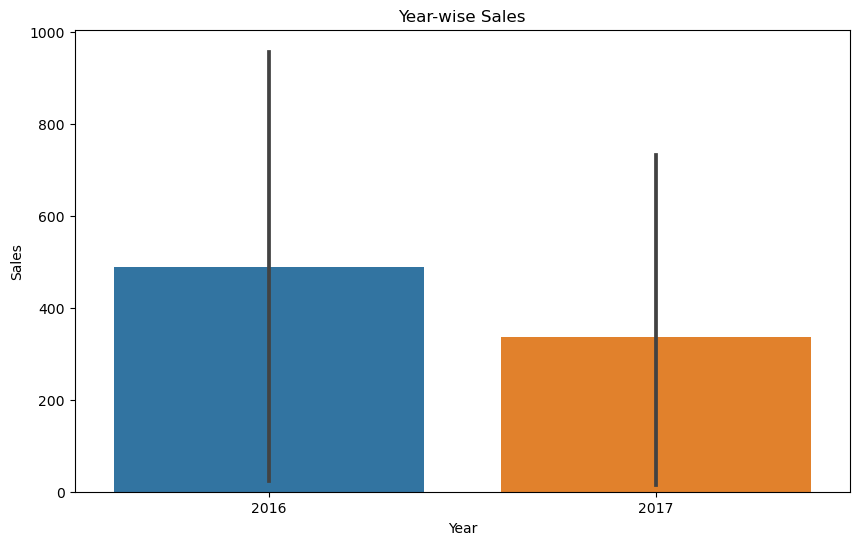

In [4]:

superstore_data['Order_Year'] = pd.to_datetime(superstore_data['Order_Date']).dt.year
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Year', y='Sales', data=superstore_data)
plt.title('Year-wise Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

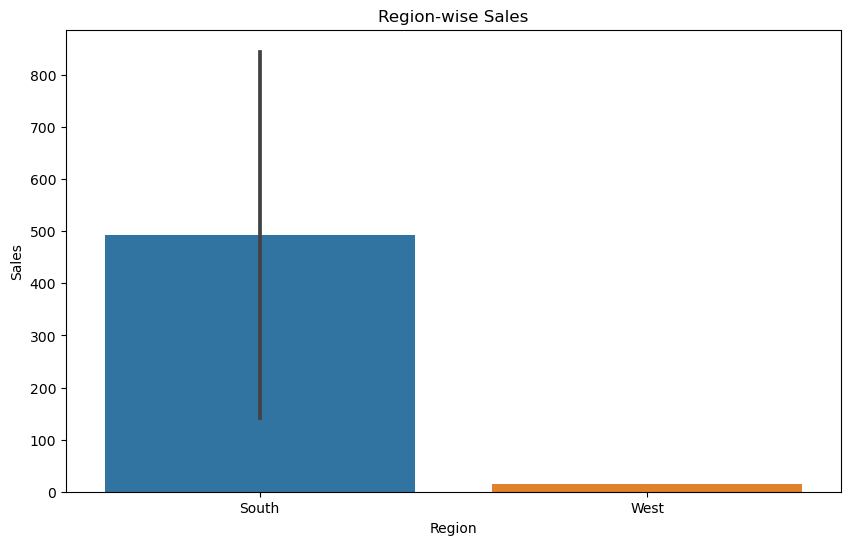

In [5]:
# D. Region-wise visualize the sales details.
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=superstore_data)
plt.title('Region-wise Sales')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

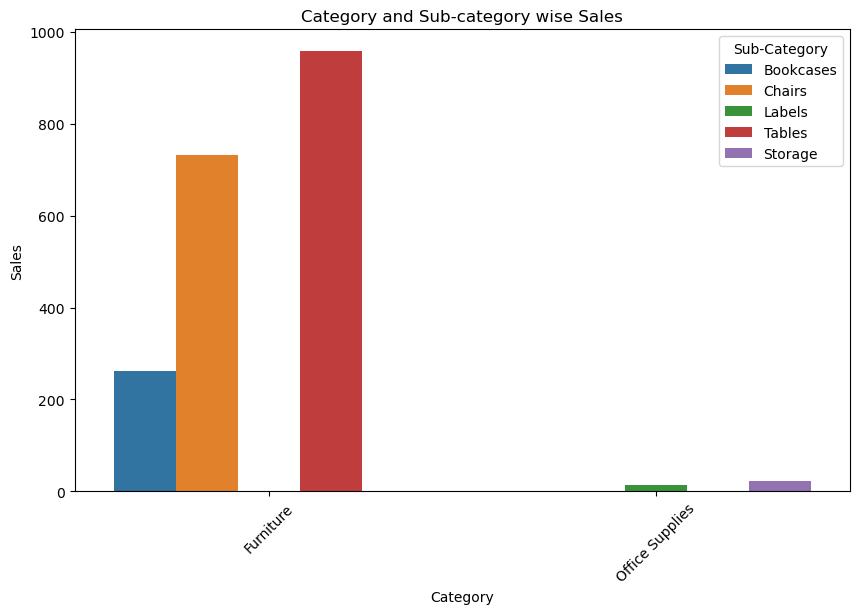

In [6]:
# E. Category and Sub-category wise visualize the sales.
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', hue='Sub_Category', data=superstore_data)
plt.title('Category and Sub-category wise Sales')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Sub-Category')
plt.show()

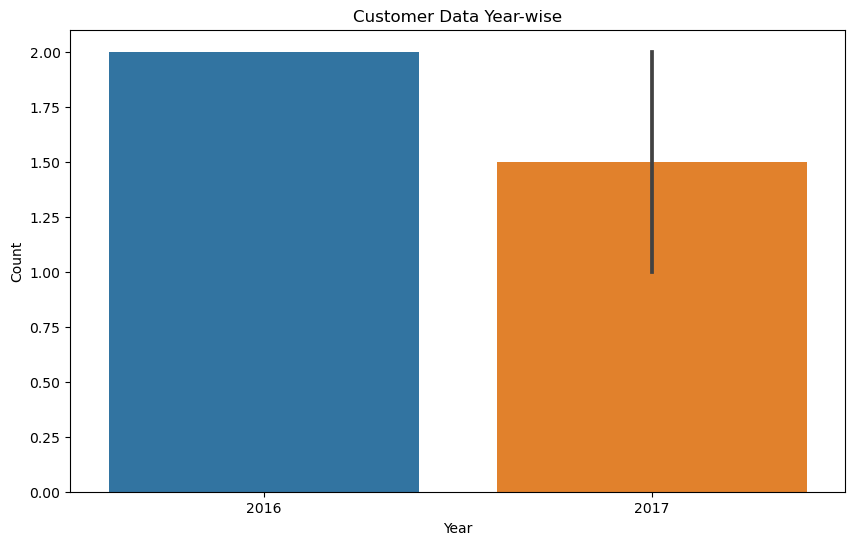

In [7]:
# A. Visualize the customer data year-wise.
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Year', y='Count', data=superstore_data.groupby(['Customer_ID', 'Order_Year']).size().reset_index(name='Count'))
plt.title('Customer Data Year-wise')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

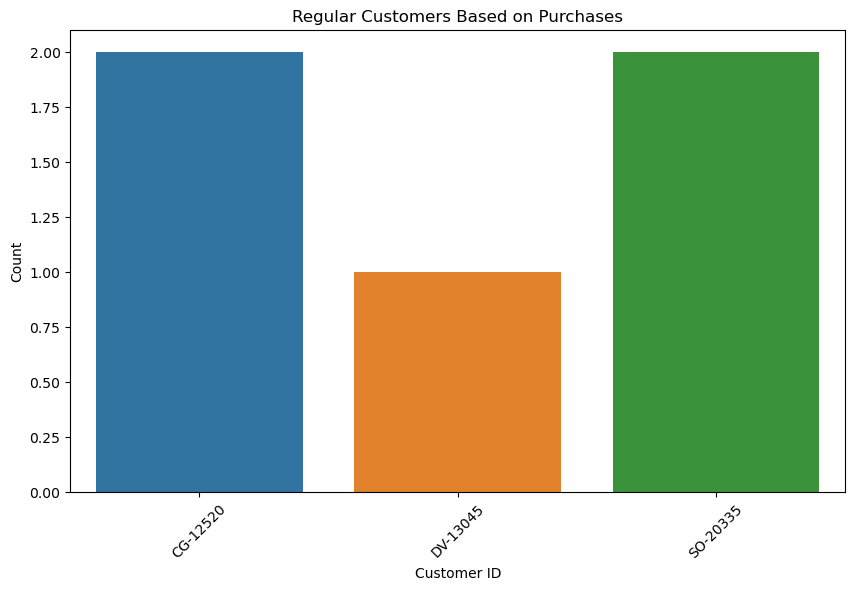

In [8]:
# B. Visualize regular customers based on their purchases.
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_ID', y='Count', data=superstore_data.groupby(['Customer_ID']).size().reset_index(name='Count'))
plt.title('Regular Customers Based on Purchases')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

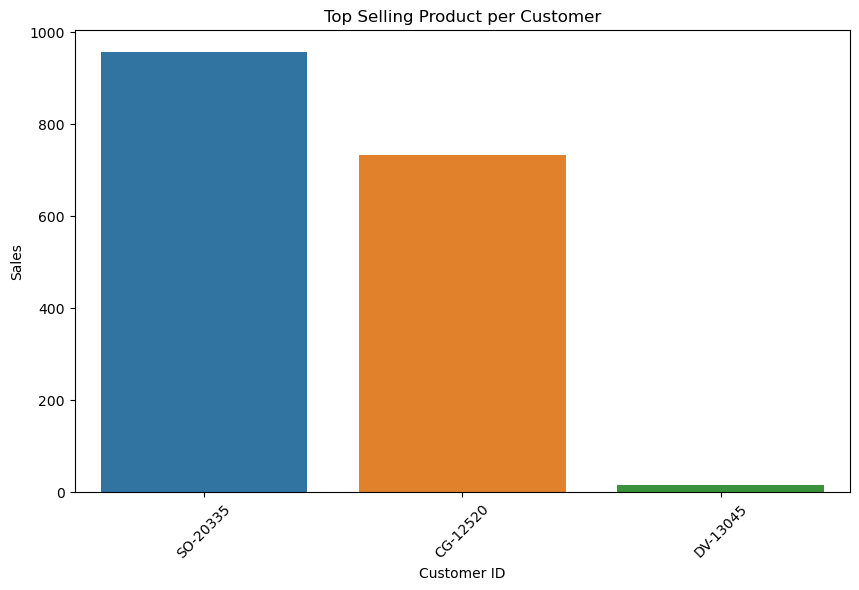

In [9]:
# C. Visualize customer-wise which is the top-selling product.
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_ID', y='Sales', data=superstore_data.groupby(['Customer_ID', 'Product_ID']).sum().reset_index().sort_values(by='Sales', ascending=False).drop_duplicates(subset='Customer_ID'))
plt.title('Top Selling Product per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

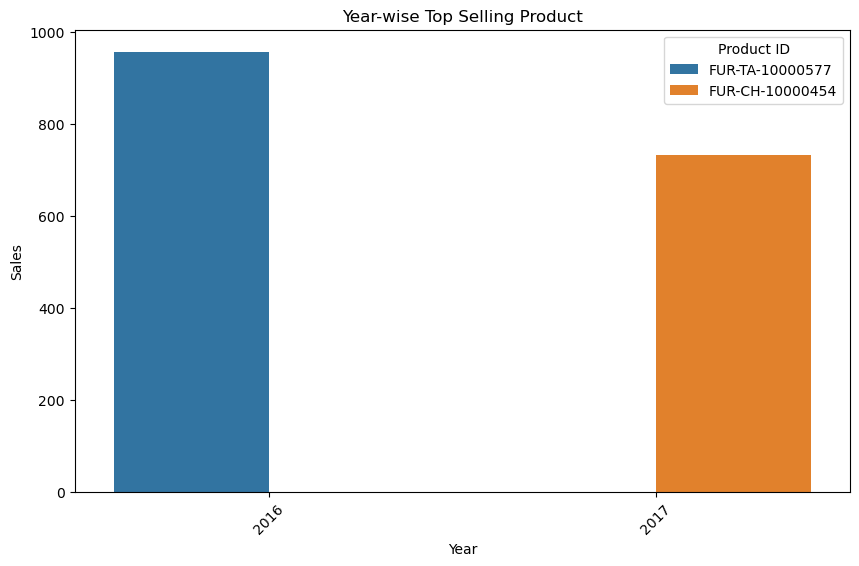

In [10]:
# D. Visualize year-wise top-selling product
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Year', y='Sales', hue='Product_ID', data=superstore_data.groupby(['Order_Year', 'Product_ID']).sum().reset_index().sort_values(by=['Order_Year', 'Sales'], ascending=[True, False]).drop_duplicates(subset='Order_Year'))
plt.title('Year-wise Top Selling Product')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Product ID')
plt.show()

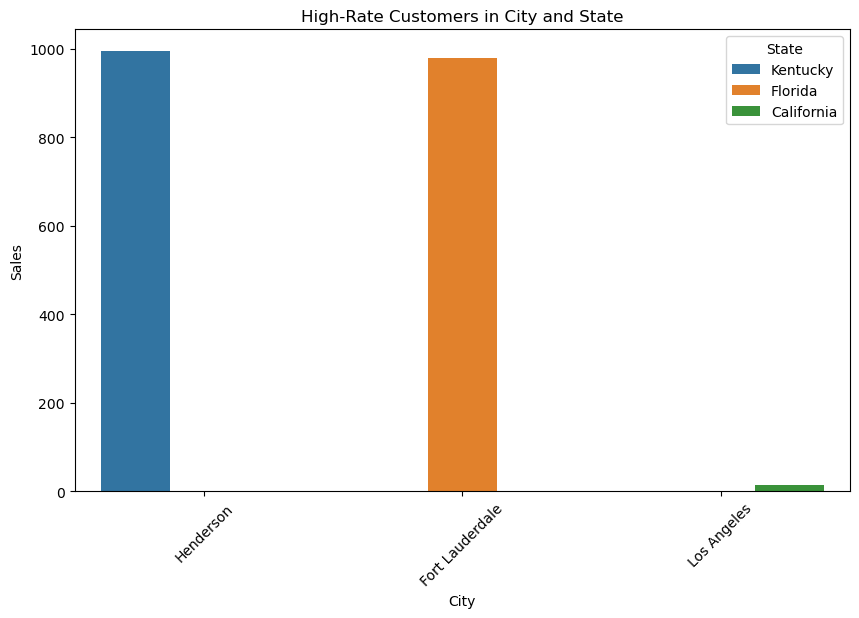

In [11]:
# E. Visualize the high-rate customers in the City and state.
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Sales', hue='State', data=superstore_data.groupby(['City', 'State']).sum().reset_index().nlargest(10, 'Sales'))
plt.title('High-Rate Customers in City and State')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


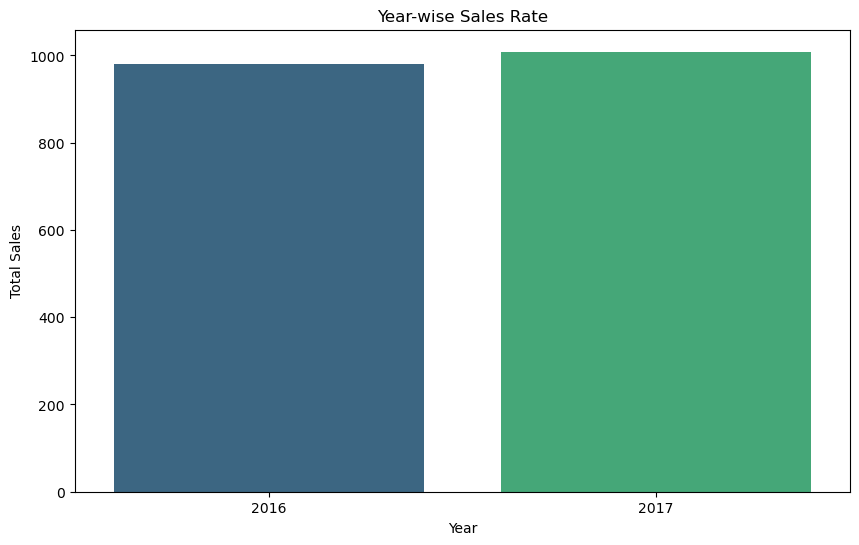

In [12]:
# A. Year-wise sales rate.
superstore_data['Order_Year'] = pd.to_datetime(superstore_data['Order_Date']).dt.year
yearly_sales = superstore_data.groupby('Order_Year')['Sales'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette='viridis')
plt.title('Year-wise Sales Rate')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

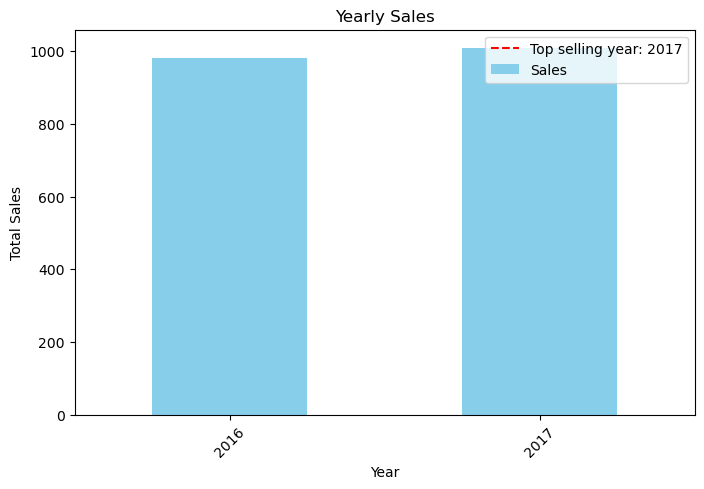

In [13]:
# B. Top selling year.
top_selling_year = yearly_sales.idxmax()
plt.figure(figsize=(8, 5))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.axvline(x=top_selling_year, color='red', linestyle='--', label=f'Top selling year: {top_selling_year}')
plt.legend()
plt.show()

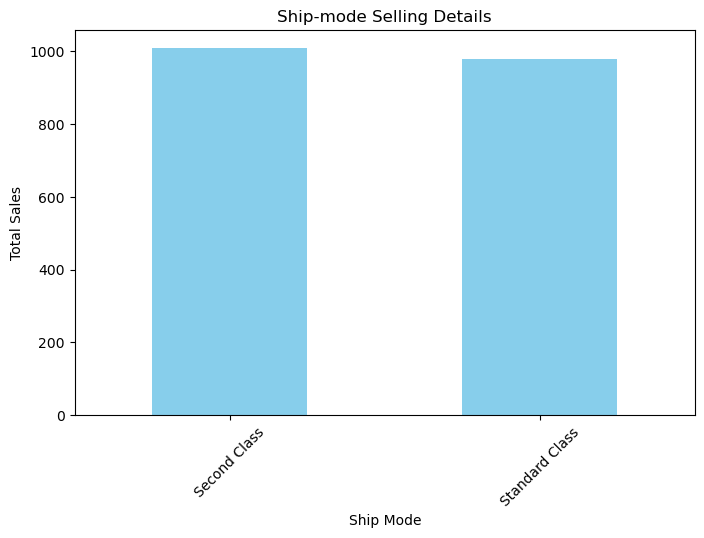

In [14]:
# C. Ship-mode selling details.
ship_mode_sales = superstore_data.groupby('Ship_Mode')['Sales'].sum()

plt.figure(figsize=(8, 5))
ship_mode_sales.plot(kind='bar', color='skyblue')
plt.title('Ship-mode Selling Details')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


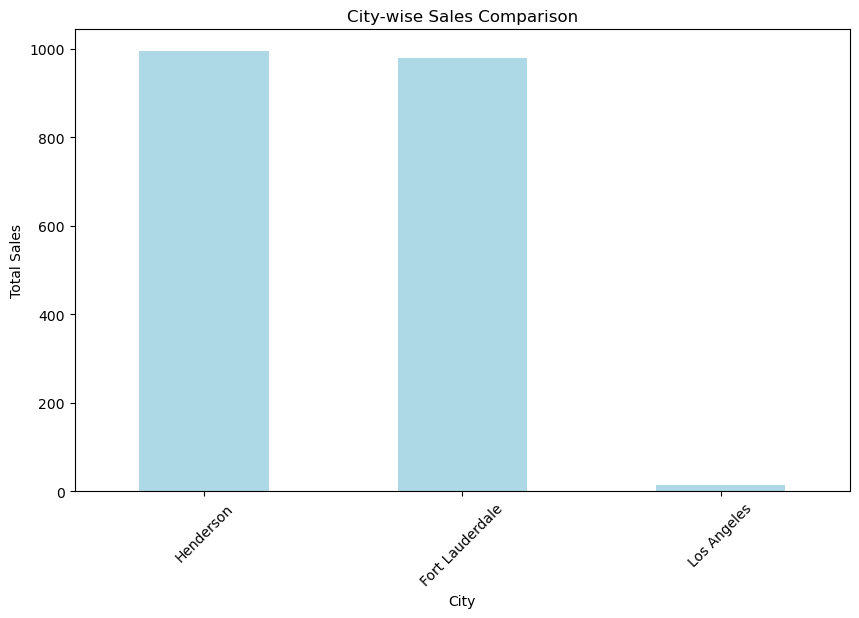

The city that sells the most products: Henderson
The city that sells the fewest products: Los Angeles


In [15]:
# D. Which city sells more products and fewer products?
city_sales = superstore_data.groupby('City')['Sales'].sum()
max_selling_city = city_sales.idxmax()
min_selling_city = city_sales.idxmin()

plt.figure(figsize=(10, 6))
city_sales.sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('City-wise Sales Comparison')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

print(f"The city that sells the most products: {max_selling_city}")
print(f"The city that sells the fewest products: {min_selling_city}")

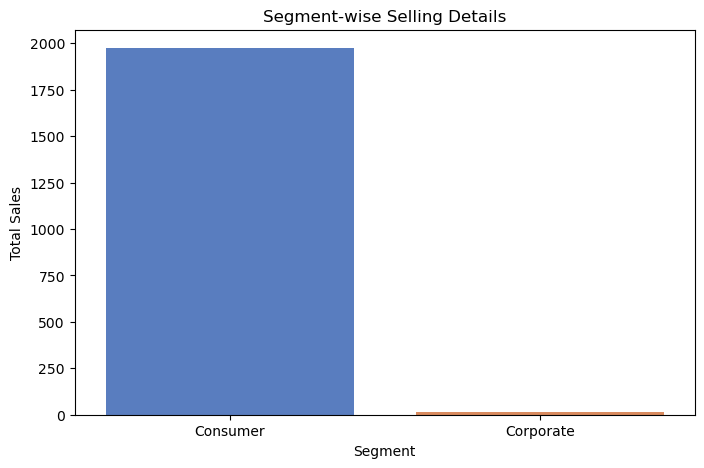

In [16]:
# E. Segment-wise selling details.
segment_sales = superstore_data.groupby('Segment')['Sales'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=segment_sales.index, y=segment_sales.values, palette='muted')
plt.title('Segment-wise Selling Details')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()
